# Introduction to Dataset

`Metadata`

Perusahaan dalam proyek ini adalah sebuah e-commerce (ritel online) yang berbasis di Inggris yang menjual hadiah dan perlengkapan rumah tangga untuk orang dewasa dan anak-anak melalui website sejak tahun 2007. Tipe data yang digunakan adalah set data transaksi penjualan selama satu tahun (November 2018 hingga November 2019).

Kumpulan data berisi 500 ribu baris dan 8 kolom. Berikut ini adalah deskripsi setiap kolom.

| **Nama Kolom**    | **Tipe Data** | **Deskripsi**                                                                                                                     |
| ----------------- | ------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **TransactionNo** | Kategorikal   | Nomor unik enam digit yang mendefinisikan setiap transaksi. Huruf "C" dalam kode menunjukkan bahwa transaksi tersebut dibatalkan. |
| **Date**          | Numerik       | Tanggal saat transaksi dilakukan.                                                                                                 |
| **ProductNo**     | Kategorikal   | Kode unik lima atau enam digit yang digunakan untuk mengidentifikasi produk tertentu.                                             |
| **Product**       | Kategorikal   | Nama produk atau barang.                                                                                                          |
| **Price**         | Numerik (£)   | Harga per unit produk dalam mata uang pound sterling (£).                                                                         |
| **Quantity**      | Numerik       | Jumlah produk dalam setiap transaksi. Nilai negatif menunjukkan bahwa transaksi tersebut dibatalkan.                              |
| **CustomerNo**    | Kategorikal   | Nomor unik lima digit yang mengidentifikasi setiap pelanggan.                                                                     |
| **Country**       | Kategorikal   | Nama negara tempat tinggal pelanggan.                                                                                             |

Ada sebagian kecil pembatalan pesanan dalam kumpulan data. Sebagian besar pembatalan ini disebabkan oleh kondisi kehabisan stok pada beberapa produk. Dalam situasi ini, pelanggan cenderung membatalkan pesanan karena mereka ingin semua produk dikirim sekaligus.

# Business Understanding

## Overview

E-commerce telah menjadi kekuatan utama dalam transformasi digital dunia bisnis, memungkinkan perusahaan menjangkau pasar yang lebih luas dengan biaya distribusi yang lebih rendah dan efisiensi yang lebih tinggi. Perusahaan ritel online yang berbasis di Inggris ini telah beroperasi sejak tahun 2007 dan menjual berbagai hadiah serta perlengkapan rumah tangga melalui situs webnya. Dengan mengandalkan data transaksi penjualan selama satu tahun terakhir (November 2018 – November 2019), perusahaan ingin memperkuat strategi pemasaran dan meningkatkan pengalaman pelanggan.

Dalam lanskap e-commerce yang sangat kompetitif, pemahaman mendalam terhadap perilaku pelanggan menjadi sangat penting. Perusahaan perlu mengetahui siapa pelanggan mereka, bagaimana kebiasaan pembelian mereka, dan bagaimana mereka dapat dikelompokkan ke dalam segmen-segmen yang memiliki karakteristik serupa.

## Objective

Tujuan utama dari proyek ini adalah:
* Menggunakan Explanatory Data Analysis (EDA) dan algoritma K-Means Clustering untuk menemukan pola dalam data pelanggan.

* Menerapkan kerangka kerja RFM (Recency, Frequency, Monetary) untuk memahami perilaku pelanggan dalam segmen yang telah ditentukan.

* Memberikan rekomendasi strategis berdasarkan hasil segmentasi untuk mendukung pengambilan keputusan dalam pemasaran dan retensi pelanggan.

Dengan memahami karakteristik dari masing-masing segmen, perusahaan dapat menyusun strategi pemasaran yang lebih terarah dan personalisasi penawaran yang lebih sesuai dengan kebutuhan pelanggan, sehingga dapat meningkatkan penjualan, loyalitas pelanggan, serta efisiensi biaya pemasaran.

# Data Understanding

## Import Libraries

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silencing the warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

## Load Dataset

In [294]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
df = pd.read_csv('/content/drive/MyDrive/Final Projek - Bayu Sadewa Azyumardi/Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [296]:
df.shape

(536350, 8)

## Data Infomation

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


Terdapat 536.350 baris dan 8 kolom. Ada beberapa tipedata yang tidak tepat seperti:
1. CustomerNo ke object karena tidak berarti apa-apa secara numerik
2. Date ke Date time karena merupakan tipe data waktu


## Data Describe

In [298]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


Banyak transaksi dengan nomor pelanggan yang hilang memiliki jumlah negatif, yang berarti pesanan dibatalkan (menurut dokumentasi dataset). Pola ini menunjukkan bahwa nomor pelanggan yang hilang lebih mungkin terjadi pada pesanan yang dibatalkan.

## Unique Value

In [299]:
# Check the unique value on Dataset
print("Unique Values")
print("-"*50)
print(df.nunique())

Unique Values
--------------------------------------------------
TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4738
Country             38
dtype: int64


In [300]:
# Check the unique value on Dataset
for i in df.columns:
  print("Unique Values")
  print("-"*80)
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique Values
--------------------------------------------------------------------------------
Unique TransactionNo's count: 23204
['581482' '581475' '581476' ... 'C536506' 'C536543' 'C536548']

Unique Values
--------------------------------------------------------------------------------
Unique Date's count: 305
['12/9/2019' '12/8/2019' '12/7/2019' '12/6/2019' '12/5/2019' '12/4/2019'
 '12/2/2019' '12/1/2019' '11/30/2019' '11/29/2019' '11/28/2019'
 '11/27/2019' '11/25/2019' '11/24/2019' '11/23/2019' '11/22/2019'
 '11/21/2019' '11/20/2019' '11/18/2019' '11/17/2019' '11/16/2019'
 '11/15/2019' '11/14/2019' '11/13/2019' '11/11/2019' '11/10/2019'
 '11/9/2019' '11/8/2019' '11/7/2019' '11/6/2019' '11/4/2019' '11/3/2019'
 '11/2/2019' '11/1/2019' '10/31/2019' '10/30/2019' '10/28/2019'
 '10/27/2019' '10/26/2019' '10/25/2019' '10/24/2019' '10/23/2019'
 '10/21/2019' '10/20/2019' '10/19/2019' '10/18/2019' '10/17/2019'
 '10/16/2019' '10/14/2019' '10/13/2019' '10/12/2019' '10/11/2019'
 '10/10/2019' '

# Data Preparation & Cleaning Data

## Missing Values

In [301]:
# Display the rows in the 'CostumerNo' collumn:
rows_in_costumerno_missing = df[df['CustomerNo'].isnull()]
print ("Rows CostumerNo With Missing Values")
rows_in_costumerno_missing

Rows CostumerNo With Missing Values


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


Semua nilai null pada CustomerNo memiliki negara yang sama dan Kuantitas negatif (kecuali satu, yang TransactionNo-nya tidak diawali dengan huruf ‘C’ dan tidak memiliki Kuantitas negatif)

In [302]:
print(df.isnull().sum())

# Display rows with missing values (if any)
print(df[df.isnull().any(axis=1)].head())

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64
       TransactionNo        Date ProductNo  \
6511         C581406   12/8/2019    46000M   
6512         C581406   12/8/2019    46000S   
90098        C575153   11/8/2019     22947   
102671       C574288   11/3/2019     22178   
117263       C573180  10/28/2019     23048   

                                ProductName  Price  Quantity  CustomerNo  \
6511           Polyester Filler Pad 45x45cm   6.19      -240         NaN   
6512           Polyester Filler Pad 40x40cm   6.19      -300         NaN   
90098            Wooden Advent Calendar Red  44.25        -1         NaN   
102671      Victorian Glass Hanging T-Light  25.37        -1         NaN   
117263  Set Of 10 Lanterns Fairy Light Star  14.50        -1         NaN   

               Country  
6511    United Kingdom  
6512    United Kingdom  
90098   United Kin

In [303]:
# By Percentage
((df.isnull().sum()/(len(df)))*100).round(4)

,0
TransactionNo,0.0000
Date,0.0000
ProductNo,0.0000
ProductName,0.0000
Price,0.0000
Quantity,0.0000
CustomerNo,0.0103
Country,0.0000


Terdapat missing value pada CustomerNo sebanyak 55. Karena hanya 55 dari total (kurang dari 1%) yang memiliki CustomerNo yang missing, maka aman untuk menghandling data tersebut.

In [304]:
#cleaning the data with missing values
df = df.dropna()
#checking the data
print ("Missing Values")
print ("-"*30)
print(df.isnull().sum())

Missing Values
------------------------------
TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64


In [305]:
# Delete cancellation transaction and quantity < 0
df = df.drop(df[df['TransactionNo'].str.startswith('C') | (df['Quantity'] < 0)].index)

In [306]:
df[df['TransactionNo'].str.startswith('C')].count()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,0
Country,0


## Data Duplicates

In [307]:
#check if there's duplicates in dataset
print ('Data Duplicates')
print ("-"*30)
print (df.duplicated(keep=False).sum())

Data Duplicates
------------------------------
9926


In [308]:
#cleaning the duplicates
df = df.drop_duplicates()

In [309]:
#checking again if there's duplicates in dataset
print ('Data Duplicates')
print ("-"*30)
print (df.duplicated(keep=False).sum())

Data Duplicates
------------------------------
0


In [310]:
df.describe()

,Price,Quantity,CustomerNo
count,522601.000000,522601.000000,522601.000000
mean,12.637160,10.667492,15226.311767
std,7.965974,157.542420,1716.555479
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13804.000000
50%,11.940000,4.000000,15152.000000
75%,14.090000,12.000000,16729.000000
max,660.620000,80995.000000,18287.000000


## Transfrom Data Types

In [311]:
# Convert CustomerNo to object (string)
df['CustomerNo'] = df['CustomerNo'].astype(int).astype('object')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

print(df.dtypes)

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo               object
Country                  object
dtype: object


## New Column

In [312]:
# Adding a new feature: Revenue
df['Revenue'] = df['Price'] * df['Quantity']

In [313]:
#Adding day name
df['Day'] = df['Date'].dt.strftime('%A')

# Adding day of week
df['DayOfWeek'] = df['Date'].dt.dayofweek.astype('category')

# Adding month
df['Month'] = df['Date'].dt.month.astype('category')

# Adding year
df['Year'] = df['Date'].dt.year.astype('category')

In [314]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Day,DayOfWeek,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64,Monday,0,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40,Monday,0,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36,Monday,0,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80,Monday,0,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64,Monday,0,12,2019


# EDA

## Setting Date & Time

In [315]:
# Setting the date and time
start_date = df.Date.min()
end_date = df.Date.max()
period = end_date - start_date

print("Start:", start_date)
print("End:", end_date)
print("Period:", period)

Start: 2018-12-01 00:00:00
End: 2019-12-09 00:00:00
Period: 373 days 00:00:00


Rentang Tanggal: Dataset ini mencakup rentang waktu dari 1 Desember 2018 hingga 9 Desember 2019 dengan periode 373 hari.

## Univariate Analysis

### Summary Statistic

In [316]:
# Define numerical columns
numerical_cols = df[['Price', 'Quantity', 'Revenue']]

# Numerical summary statistics
numerical_cols.describe().round(2)

,Price,Quantity,Revenue
count,522601.00,522601.00,522601.00
mean,12.64,10.67,120.13
std,7.97,157.54,1860.16
min,5.13,1.00,5.13
25%,10.99,1.00,17.90
50%,11.94,4.00,44.48
75%,14.09,12.00,120.80
max,660.62,80995.00,1002718.10


Temuan dan Hasil:

* Outliers: Kolom Harga, Kuantitas, dan Pendapatan menunjukkan potensi outlier (nilai ekstrem), yang mengindikasikan adanya beberapa transaksi yang sangat besar.

* Distribusi Miring: Kolom Harga, Kuantitas, dan Pendapatan menunjukkan distribusi miring ke kanan, di mana nilai rata-ratanya lebih tinggi daripada mediannya. Distribusi ini menunjukkan bahwa beberapa transaksi melibatkan harga, kuantitas, dan pendapatan produk yang lebih tinggi daripada transaksi pada umumnya.

Berdasarkan sumber data, kita dapat mengasumsikan bahwa beberapa nilai yang sangat tinggi pada kolom Kuantitas dan Pendapatan adalah transaksi dari usaha kecil yang membeli dalam jumlah besar dan menjual ke pelanggan lain melalui saluran outlet ritel. Selanjutnya akan memeriksa dengan box plot untuk melihat transaksi mana yang memiliki nilai yang tidak biasa ini secara akurat.

`Catatan: Penanganan outlier akan dilakukan selama tahap preprocessing. Fitur Harga memang memiliki beberapa nilai yang sangat tinggi, tetapi jaraknya dari kisaran umum tidak seekstrim Kuantitas dan Pendapatan.`

In [317]:
# Define categorical columns
categorical_cols = df[['TransactionNo', 'ProductNo', 'ProductName', 'CustomerNo', 'Country', 'DayOfWeek', 'Month', 'Year']]

# categorical summary statistics
categorical_cols.describe().round(2)

,TransactionNo,ProductNo,ProductName,CustomerNo,Country,DayOfWeek,Month,Year
count,522601,522601,522601,522601,522601,522601,522601,522601
unique,19789,3753,3753,4718,38,6,12,2
top,573585,85123A,Cream Hanging Heart T-Light Holder,17841,United Kingdom,6,11,2019
freq,1110,2324,2324,7671,472716,99706,81819,481702


Temuan dan Hasil:

* Produk Teratas: Produk dengan volume penjualan tertinggi adalah Cream Hanging Heart T-Light Holder, dengan 2.324 transaksi.

* Negara Populer: Sebagian besar pelanggan, yang mewakili 90% dari semua transaksi, berasal dari Inggris.

* Bulan Transaksi Tertinggi: November muncul sebagai bulan dengan transaksi terbanyak dengan 81.819 transaksi.

* Hari Tersibuk: Hari Minggu adalah hari yang paling populer untuk transaksi, dengan jumlah transaksi yang luar biasa, yaitu 99.706 transaksi.

### Distribution

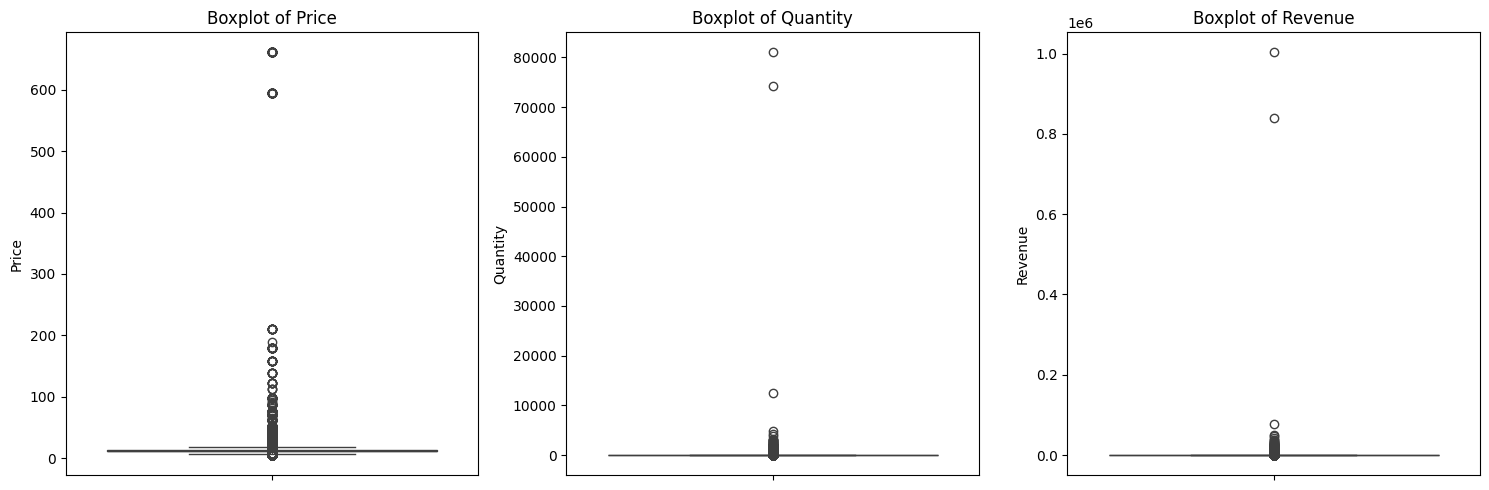

In [318]:
# Define Numerical Column
numerical_cols = ['Price', 'Quantity', 'Revenue']

# Plot
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Karena adanya outlier dengan nilai ekstrem, sulit untuk melihat boxplot dari kolom Harga, Kuantitas, dan Pendapatan secara akurat. Untuk memvisualisasikan distribusi sebagian besar data dengan lebih baik, kita dapat menyesuaikan batas sumbu y untuk sementara waktu agar fokus pada bagian boxplot.

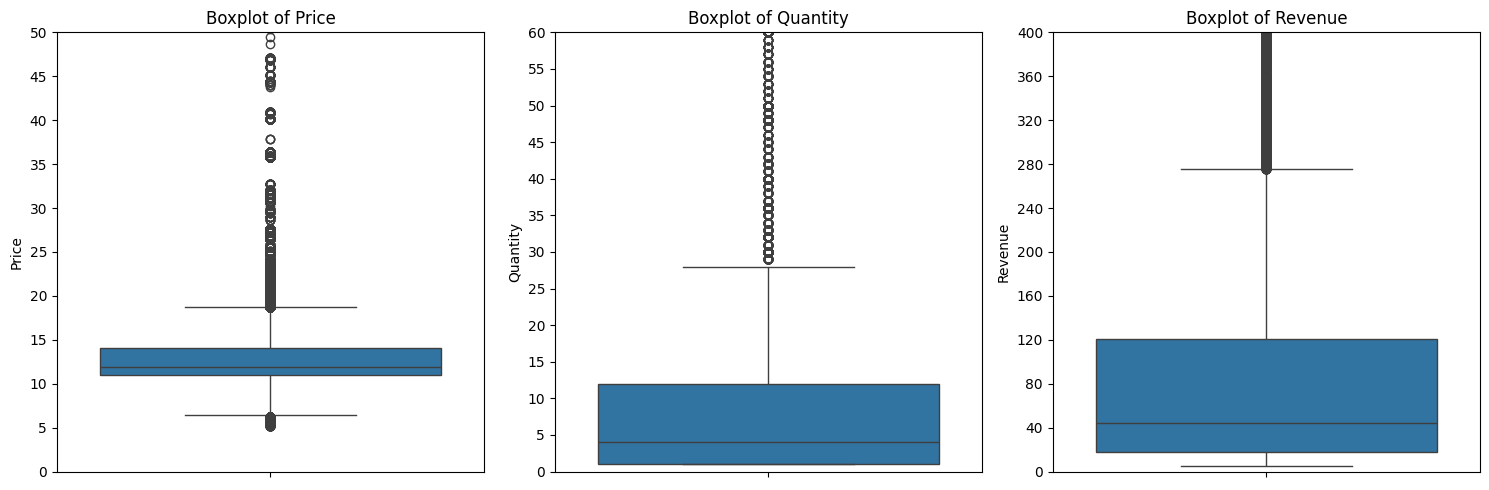

In [319]:
# Plot
plt.figure(figsize=(15, 5))

# loop of Numerical Cols
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Sesuaikan batas sumbu Y per kolom
    if col == 'Price':
        plt.ylim(0, 50)
        plt.yticks(range(0, 51, 5))
    elif col == 'Quantity':
        plt.ylim(0, 60)
        plt.yticks(range(0, 61, 5))
    else:  # Revenue
        plt.ylim(0, 400)
        plt.yticks(range(0, 401, 40))

plt.tight_layout()
plt.show()

Temuan dan Hasil:
1. Price (Harga Satuan)

* Rentang harga produk berada di antara £11 hingga £14, yang mencerminkan harga umum untuk produk e-commerce dalam dataset ini.

* Terdapat sejumlah outlier di bawah ~£10 dan di atas £15, dengan beberapa harga ekstrim melebihi £500 per unit.

2. Quantity (Jumlah Produk per Transaksi)

* Sebagian besar transaksi mencakup 1 hingga 11 unit produk, dengan kuartil ketiga (Q3) di sekitar 11.

* Banyak outlier muncul di atas 26 unit, dan ada dua transaksi ekstrem yang masing-masing memesan lebih dari 70.000 unit. Ini sangat jauh dari pola umum dan memengaruhi interpretasi agregat.

3. Revenue (Pendapatan per Transaksi)

* Pendapatan transaksi rata-rata berkisar dari ~£20 hingga £120.

* Muncul beberapa outlier dengan pendapatan di atas £300, dan terdapat dua transaksi besar yang menghasilkan pendapatan lebih dari £800.000.



`Penanganan Transaksi yang ekstrem`

Berdasarkan temuan dari visualisasi dan statistik deskriptif:

* Transaksi dengan Quantity > 70.000 dan Revenue > £800.000 dianggap sebagai outlier ekstrem.

* Transaksi ini sangat tidak umum, dan kemungkinan besar retail dengan pembelian dalam jumlah besar dan kesalahan input

In [320]:
# Finding the Data with Ekstrem Value
df[(df['Quantity'] > 70000) | (df['Revenue'] > 800000)]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Day,DayOfWeek,Month,Year
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446,United Kingdom,1002718.1,Monday,0,12,2019
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346,United Kingdom,840113.8,Friday,4,1,2019


Setelah melakukan pemeriksaan ada dua pelanggan yang melakukan transaksi dalam jumlah besar. Mereka membeli suvenir dalam jumlah yang sangat banyak, termasuk Paper Craft Little Birdie dan Medium Ceramic Top Storage Jar, yang menyebabkan angka pendapatan meningkat. Sebaiknya hapus transaksi dengan nilai ekstrem tersebut dan fokus pada bagian data yang lebih representatif.

In [321]:
# Removing Extreme Value from The Data Set
df = df[(df['Quantity'] <= 70000) & (df['Revenue'] <= 800000)]

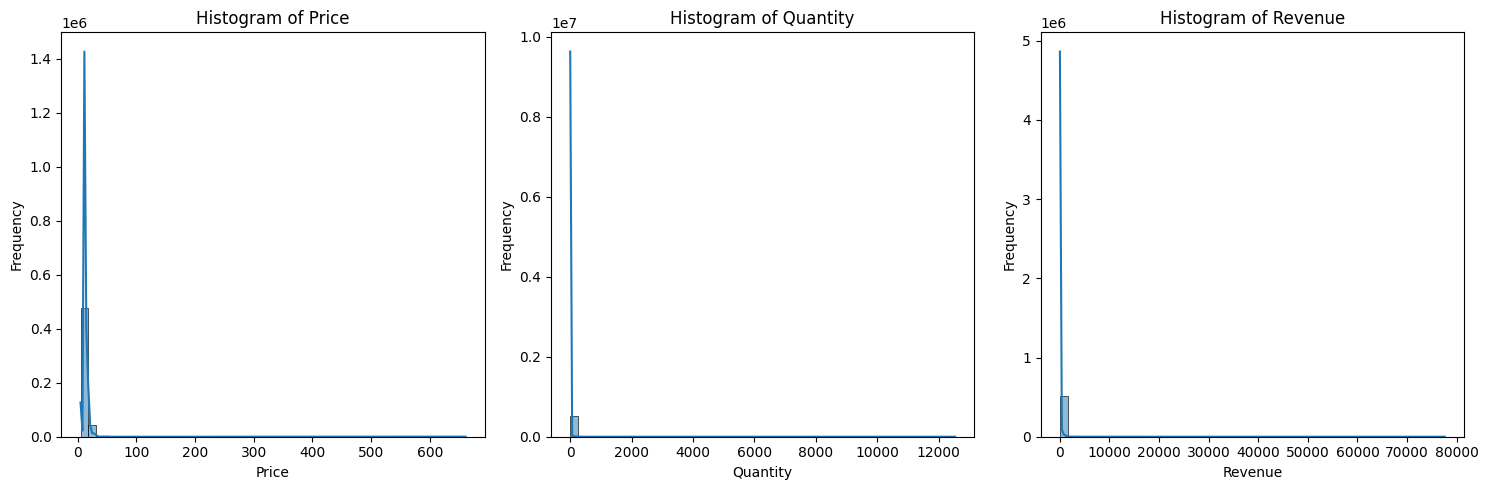

In [322]:
# Plot Histogram
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Seperti yang kita lihat bahwa distribusi tidak terlihat dengan jelas karena outlier yang ekstrem namun kita bisa melihat bahwa distribusi tersebut skew kanan.

In [323]:
# Simpan ke folder di Google Drive
df.to_csv("/content/drive/My Drive/Final Projek - Bayu Sadewa Azyumardi/data_clean.csv", index=False)
print("File berhasil di-upload ke Google Drive.")

File berhasil di-upload ke Google Drive.


### Top 10 Distributions of TransactionNo and CustomerNo.

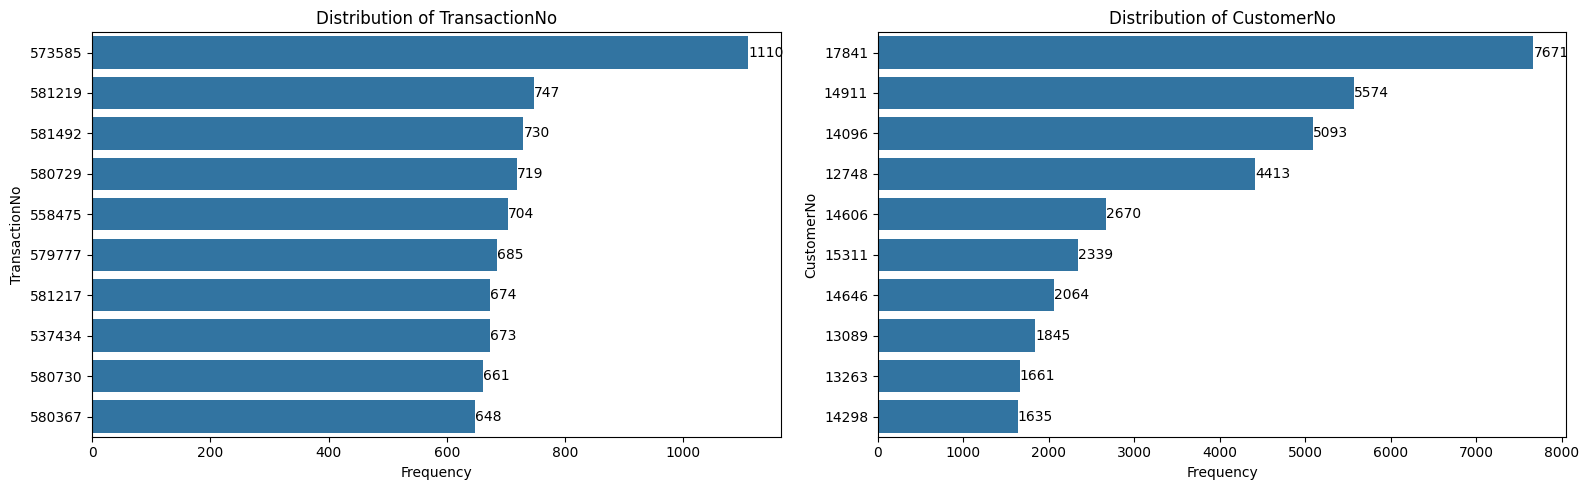

In [324]:
# list of columns
cols = ['TransactionNo', 'CustomerNo']

# Set figure and axes sizes
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Loop
for i in range(len(cols)):

    # Countplot
    sns.countplot(y=df[cols[i]],
                  order=df[cols[i]].value_counts().iloc[:10].index,
                  ax=ax[i])

    # Bar Label
    ax[i].bar_label(ax[i].containers[0])

    # Add axis titles and labels
    ax[i].set_title(f'Distribution of {cols[i]}')
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel(cols[i])

# Show
plt.tight_layout()
plt.show()

Nomor transaksi 573585 memiliki frekuensi tertinggi, terhitung lebih dari 1.000 transaksi. Pelanggan 17841 muncul sebagai pelanggan paling setia, setelah melakukan lebih dari 7500 transaksi antara akhir 2018 dan 2019.

### Top 10 Most Frequent Countries.

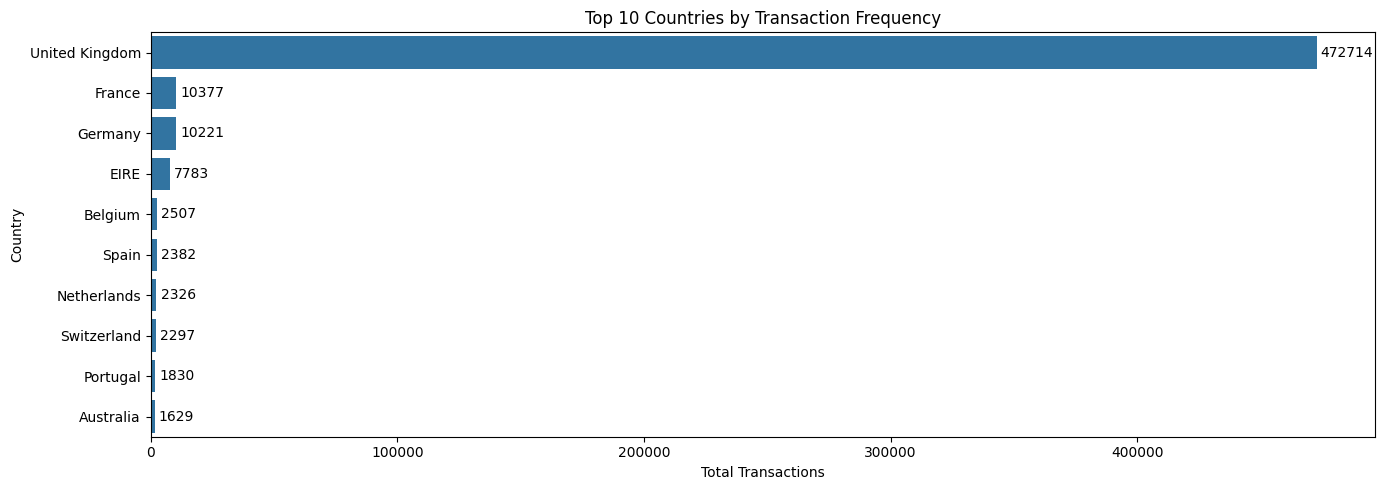

In [325]:
# Set figure and axes sizes
fig, ax = plt.subplots(figsize=(14, 5))

# Countplot
sns.countplot(
    y=df['Country'],
    order=df['Country'].value_counts().iloc[:10].index,
    ax=ax
)

# bar Label
ax.bar_label(ax.containers[0], padding=3)

# Add axis titles and labels
ax.set_title('Top 10 Countries by Transaction Frequency')
ax.set_xlabel('Total Transactions')
ax.set_ylabel('Country')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

Inggris mendominasi frekuensi transaksi, terhitung 90% dari semua transaksi (jelas karena Inggris adalah basis e-commerce ini). Namun, beberapa negara lain, termasuk Prancis, Jerman, dan Irlandia (EIRE), menyumbang proporsi yang cukup besar dari kumpulan data.

### Top 10 Products with The Most Purchases

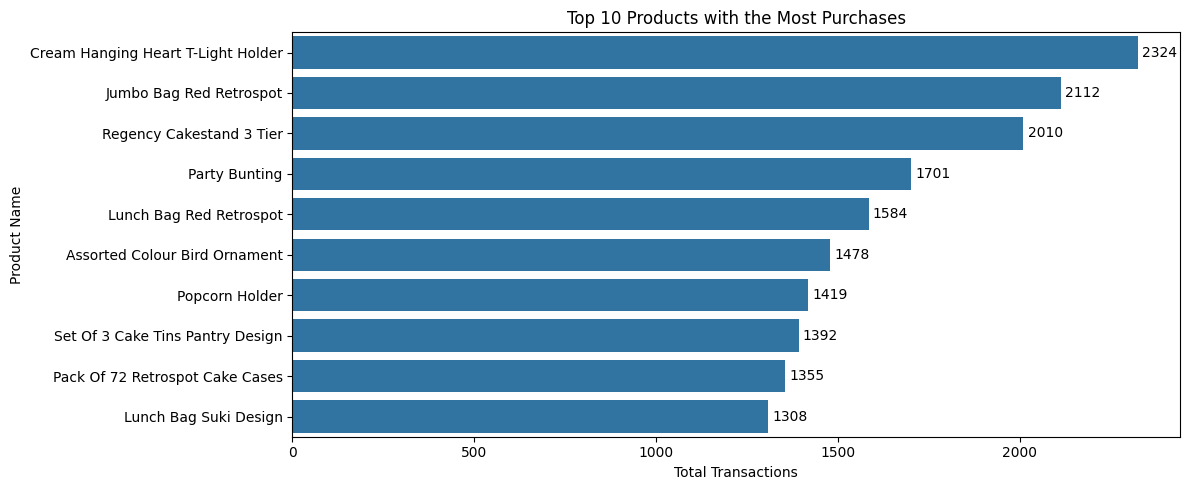

In [326]:
# Set figure and axes sizes
fig, ax = plt.subplots(figsize=(12, 5))

# Countplot
sns.countplot(
    y=df['ProductName'],
    order=df['ProductName'].value_counts().iloc[:10].index,
    ax=ax
)

# Bar Label
ax.bar_label(ax.containers[0], padding=3)

# Add axis titles and labels
ax.set_title('Top 10 Products with the Most Purchases')
ax.set_xlabel('Total Transactions')
ax.set_ylabel('Product Name')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

Produk terlaris ini terbagi dalam tiga kategori: dekorasi rumah, perlengkapan pesta, serta makanan dan perlengkapan dapur. The Cream Hanging Heart T-Light Holder adalah produk paling populer dari tahun 2018 hingga 2019.

### Distribution of Day, Month, & Year

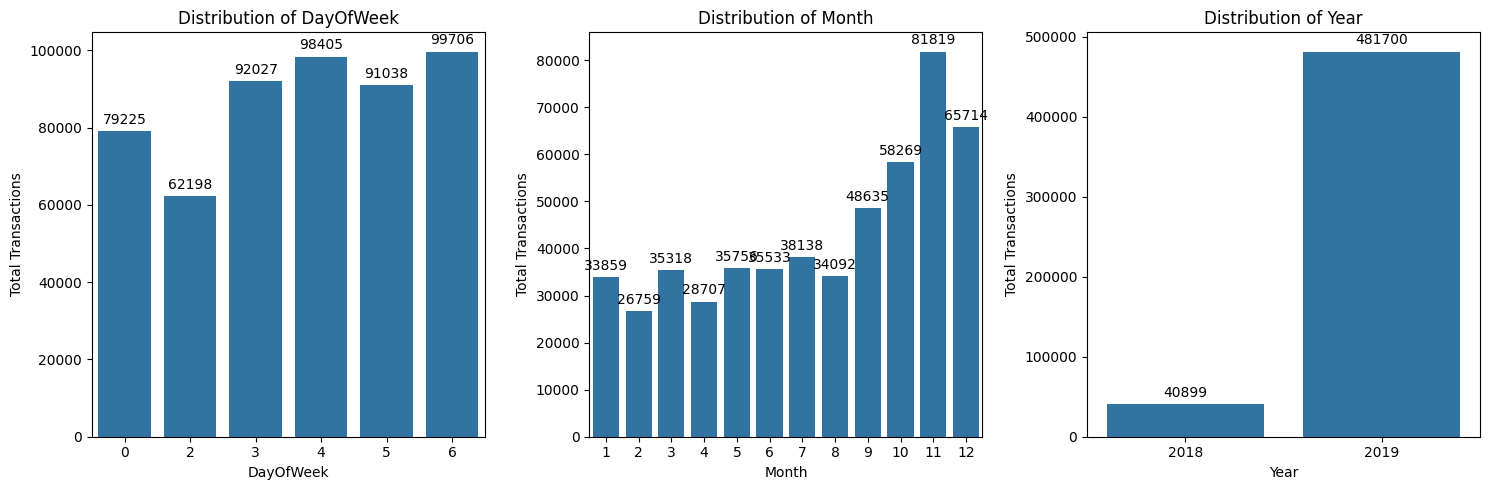

In [327]:
# List Categorical Column
cats = ['DayOfWeek', 'Month', 'Year']

# Set figure and axes sizes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Loop
for i in range(len(cats)):
    sns.countplot(x=cats[i], data=df, ax=ax[i])

    # Bar Label
    ax[i].bar_label(ax[i].containers[0], padding=3)

    # Add axis titles and labels
    ax[i].set_title(f'Distribution of {cats[i]}')
    ax[i].set_xlabel(cats[i])
    ax[i].set_ylabel('Total Transactions')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

* Transaksi Hari dalam Seminggu: Tidak adanya transaksi pada hari Selasa menunjukkan bahwa platform e-commerce tutup pada hari Selasa, atau mungkin ada kesenjangan data untuk transaksi pada hari itu. Menariknya, hari Jumat dan Minggu adalah hari dengan volume transaksi tertinggi.

* Transaksi Bulanan: Tren yang jelas muncul dari variabel ‘Bulan’, yang menunjukkan peningkatan transaksi yang stabil menjelang akhir tahun. November adalah bulan dengan volume transaksi tertinggi. Pola musiman ini dapat dikaitkan dengan belanja liburan dan peningkatan belanja konsumen selama periode tersebut.

* Transaksi Tahunan: Meskipun variabel ‘Tahun’ menunjukkan lonjakan transaksi yang signifikan antara tahun 2018 dan 2019, penting untuk dicatat bahwa data tahun 2018 hanya mencakup transaksi dari bulan Desember. Oleh karena itu, kami tidak dapat menyimpulkan secara pasti apakah ada peningkatan transaksi yang nyata antara tahun 2018 dan 2019 tanpa data satu tahun penuh untuk kedua tahun tersebut. Investigasi lebih lanjut akan diperlukan untuk menentukan apakah tren ini berlanjut sepanjang tahun.

## Bivariate Analysis

### Sales Trend Over Time

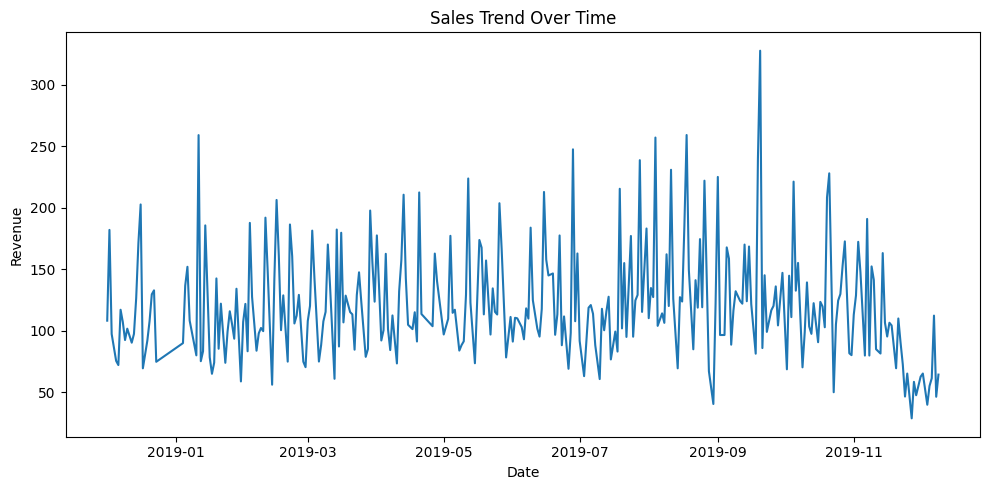

In [328]:
# Set figure and axes sizes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot
sns.lineplot(x='Date', y='Revenue', data=df, ci=None, ax=ax)

# Add axis titles and labels
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('Sales Trend Over Time')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

Tren penjualan secara keseluruhan di seluruh dataset menunjukkan pola yang agak stasioner, dengan sedikit kecenderungan menurun menjelang akhir 2019. Menariknya, lonjakan penjualan yang mencolok terjadi sekitar bulan September-Oktober 2019.

### Monthly Avg Sales Performance

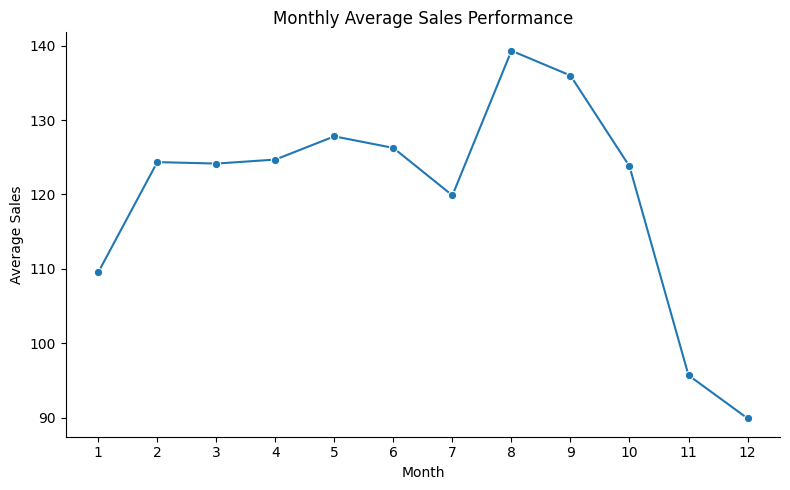

In [329]:
# Groupby Month and Revenue
monthly_avg = df.groupby('Month')['Revenue'].mean().reset_index()

# Setting the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the monthly sales
sns.lineplot(x='Month', y='Revenue', data=monthly_avg, ci=None, marker='o', ax=ax)

# Removing the top and right spines
sns.despine(right=True)

# Setting the label names of both axes
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales')

# Setting the title
ax.set_title('Monthly Average Sales Performance')

# Setting the xticks
ax.set_xticks(range(1, 13))

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

Pada visualisasi sebelumnya meskipun terlihat adanya peningkatan volume transaksi menjelang akhir tahun, khususnya di bulan November, tren penjualan rata-rata menunjukkan pola yang berbeda. Plot penjualan rata-rata bulanan menunjukkan tren kenaikan dari Januari hingga Agustus, dengan Agustus menandai puncak penjualan. Namun, tren kenaikan ini diikuti oleh penurunan tajam menjelang akhir tahun.

Kemungkinan perbedaan ini disebabkan oleh pergeseran perilaku pembelian selama periode-periode tersebut. Meskipun volume transaksi tinggi, jumlah rata-rata pembelian di seluruh transaksi cenderung lebih rendah. Dengan kata lain, orang mungkin membeli lebih banyak barang selama periode-periode tersebut, tetapi memilih produk dengan harga yang lebih rendah atau melakukan pembelian dalam jumlah yang lebih kecil secara keseluruhan.

### Monthly Avg Product Price & Quantity

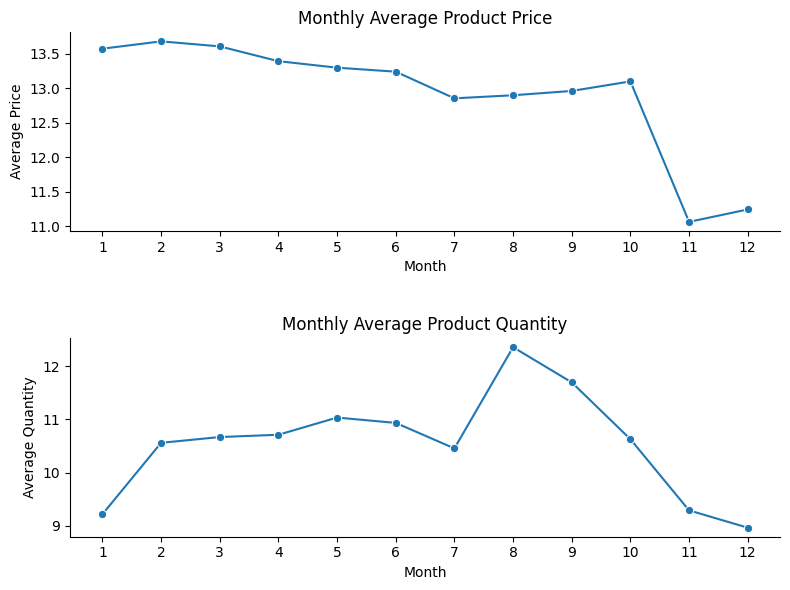

In [330]:
# Groupby the Data to Make Monthly Trends More Representative
monthly_avg = df.groupby('Month')[['Price', 'Quantity']].mean().reset_index()

# Variables to be plotted
price_qty = ['Price', 'Quantity']

# Add Figure and Ax Sizes
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Loop
for i in range(len(price_qty)):
    sns.lineplot(x='Month', y=price_qty[i], data=monthly_avg, ci=None, marker='o', ax=ax[i])

    # Title of Each Subplot
    if i == 0:
        ax[i].set_title('Monthly Average Product Price')
        ax[i].set_ylabel('Average Price')
    else:
        ax[i].set_title('Monthly Average Product Quantity')
        ax[i].set_ylabel('Average Quantity')

    # Label X-axis
    ax[i].set_xlabel('Month')

    # Set xticks
    ax[i].set_xticks(range(1, 13))

    # Removing the top and right spines
    sns.despine(ax=ax[i], right=True)

# Show
plt.tight_layout(h_pad=3)
plt.show()

Temuan dan Hasil:

Visualisasi pada kedua plot tersebut mengungkapkan alasan yang mendasari di balik volume transaksi yang tinggi tetapi total penjualan yang lebih rendah yang diamati dari bulan September hingga Desember. Selama bulan-bulan ini, perilaku pembelian pelanggan bergeser ke produk dengan harga lebih rendah dengan jumlah yang lebih kecil.

### Daily Avg Sales Performance

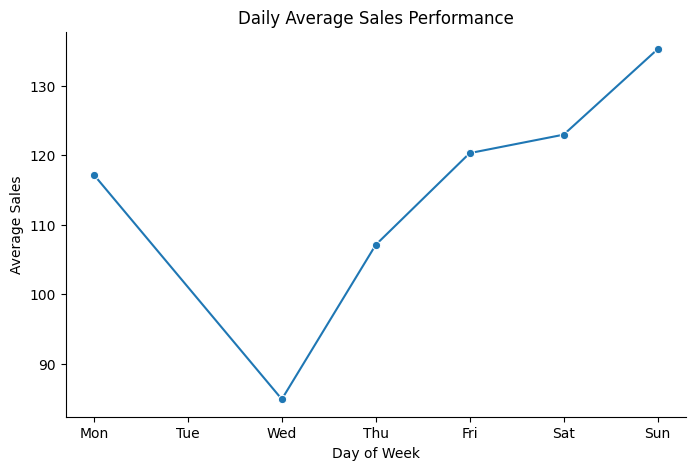

In [331]:
# Aggregating the average income per day
avg_daily = df.groupby('DayOfWeek')['Revenue'].mean().reset_index()

# Add Fig and Ax Sizes
fig, ax = plt.subplots(figsize=(8, 5))

# Marker
sns.lineplot(x='DayOfWeek', y='Revenue', data=avg_daily, marker='o', ax=ax)

# Set the day label (0 = Mon, 6 = Sun)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Set the Title and the Label
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Sales')
ax.set_title('Daily Average Sales Performance')

# Removing the top and right spines
sns.despine(ax=ax, right=True)

# Show
plt.show()

Temuan dan Hasil:

Analisis kinerja penjualan harian menunjukkan tren kenaikan yang signifikan menjelang akhir minggu, dengan puncak penjualan pada hari Minggu. Sebaliknya, daya beli pelanggan terlihat lebih lemah pada pertengahan minggu, dari hari Selasa hingga Rabu. Perilaku ini dapat disebabkan oleh berbagai faktor, seperti orang-orang yang lebih fokus pada pekerjaan atau sekolah selama seminggu atau memiliki lebih sedikit waktu luang untuk berbelanja.

### Top 10 Country with Highest Sales

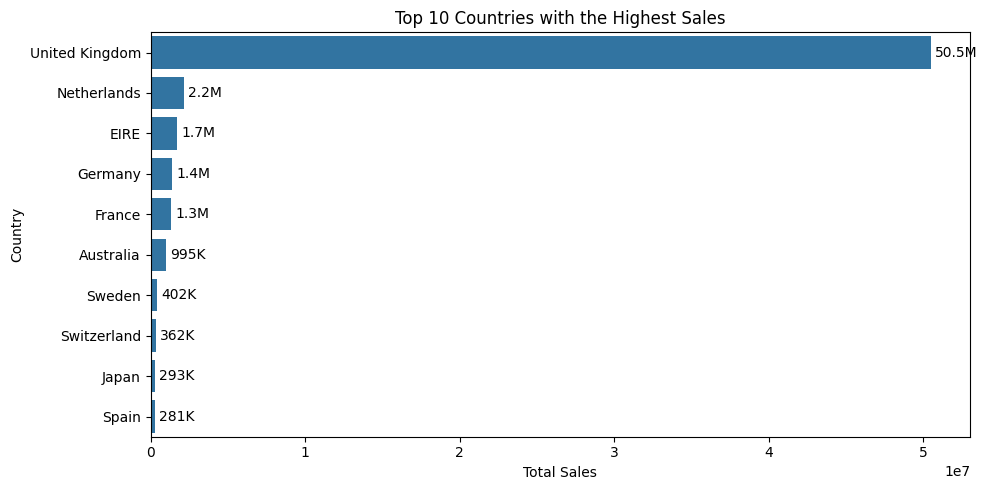

In [332]:
# Aggregating sales by country
country_sales = df.groupby('Country', as_index=False)['Revenue'].sum()

# Sort and get top 10 countries
top10 = country_sales.sort_values('Revenue', ascending=False).iloc[:10]

# Function to format numbers (e.g. 52000000 -> '52.0M')
def format_millions(x):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Revenue', y='Country', data=top10, ax=ax)

# Add formatted bar labels
labels = [format_millions(v) for v in top10['Revenue']]
ax.bar_label(ax.containers[0], labels=labels, padding=3)

# Set axis labels and title
ax.set_xlabel('Total Sales')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries with the Highest Sales')

# Show plot
plt.tight_layout()
plt.show()

Temuan dan Hasil:

Plot di atas menunjukkan perbedaan yang jelas antara Inggris dan negara-negara lain. Perbedaan ini tidak mengherankan mengingat platform e-commerce berbasis di Inggris, yang secara alami menarik basis pelanggan yang lebih tinggi. Namun, terlepas dari dominasi Inggris, beberapa negara lain juga memberikan kontribusi penting terhadap penjualan secara keseluruhan:

* Belanda: 2,2 juta
* Irlandia (ERIE): 1,7 juta
* Jerman: 1,4 juta
* Prancis: 1,3 juta
* Australia: 995.000

### Top 10 Country with the Highest Median Order Quantity

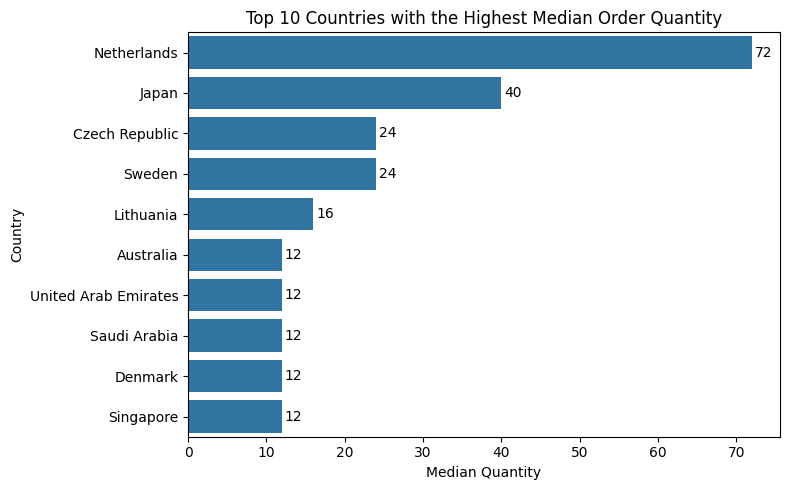

In [333]:
# Aggregating the median quantity
country_quantity = df.groupby('Country', as_index=False)['Quantity'].median()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Top 10 countries with the highest median quantity
top10_qty = country_quantity.sort_values('Quantity', ascending=False).iloc[:10]

# Barplot
sns.barplot(x='Quantity', y='Country', data=top10_qty, ax=ax)

# Bar label
ax.bar_label(ax.containers[0], padding=2)

# Axis and title labels
ax.set_xlabel('Median Quantity')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries with the Highest Median Order Quantity')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

`Catatan: Karena kolom Kuantitas miring ke kanan, kita akan menggunakan median sebagai representasi yang lebih baik.`

Anehnya, meskipun memiliki jumlah transaksi dan angka penjualan tertinggi, Inggris tidak termasuk dalam 10 besar negara dengan jumlah pesanan rata-rata tertinggi. Sebaliknya, Belanda muncul sebagai yang tertinggi, dengan jumlah pesanan rata-rata 72 per transaksi. Tren ini menunjukkan bahwa pelanggan dari negara-negara di luar lokasi basis platform e-commerce di Inggris cenderung melakukan pemesanan yang lebih besar. Pengamatan ini dapat menyiratkan bahwa produk yang ditawarkan oleh toko memiliki karakteristik unik yang sangat menarik bagi pembeli internasional.

In [334]:
# Find the total number of products offered
print(f"Total product: {df['ProductName'].nunique()}")

Total product: 3752


Temuan dan Hasil:

Dengan produk yang sangat banyak yaitu 3.753 item, platform e-commerce ini menawarkan pelanggannya beragam pilihan.

### Top 10 Products with The Highest Sales

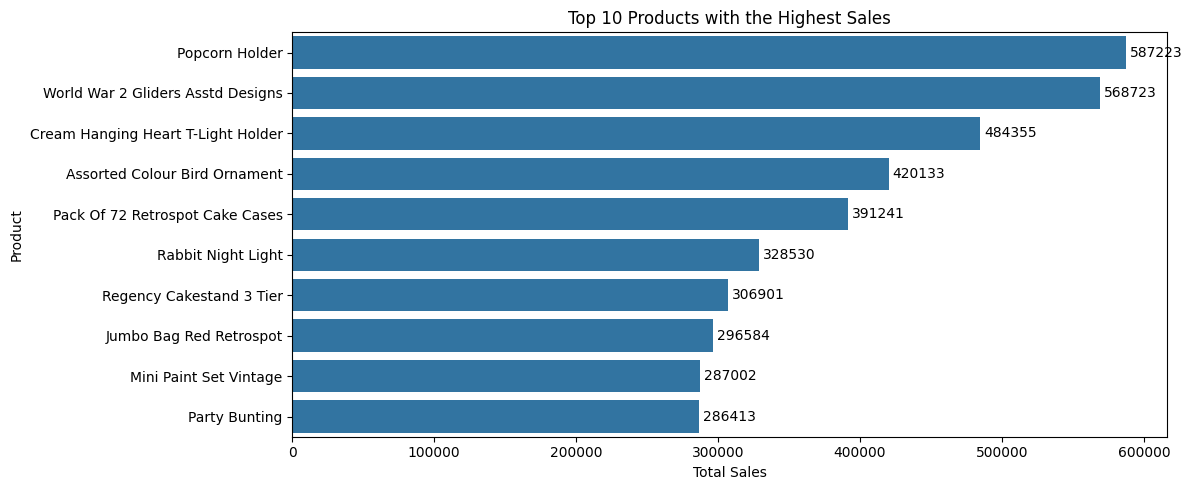

In [335]:
# Aggregating Total Sales by Product
product_sales = df.groupby('ProductName', as_index=False)['Revenue'].sum()

# Add Fig and Ax Sizes
fig, ax = plt.subplots(figsize=(12, 5))

# Take the top 10 products with the highest sales
top10_products = product_sales.sort_values('Revenue', ascending=False).iloc[:10]

# Plotting
sns.barplot(x='Revenue', y='ProductName', data=top10_products, ax=ax)

# Add Bar Label
ax.bar_label(ax.containers[0], padding=3)

# Add axis labels and titles
ax.set_xlabel('Total Sales')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products with the Highest Sales')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

10 produk teratas dengan total penjualan tertinggi mewakili beragam produk rumah tangga, barang dekoratif, dan mainan, dengan Tempat Popcorn menjadi produk terlaris dalam 12 bulan terakhir.

### Top 10 Country with the Highest Median Order Quantity

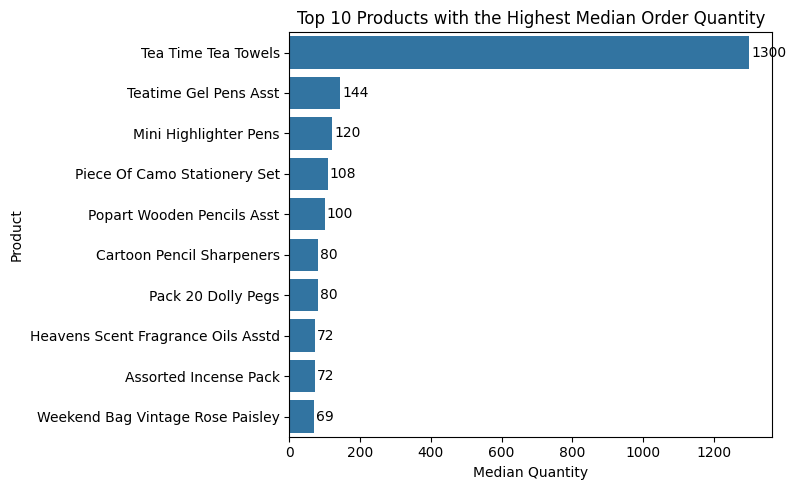

In [336]:
# Aggregating the Median Quantity by Product
product_quantity = df.groupby('ProductName', as_index=False)['Quantity'].median()

# Add Fig and Ax sizes
fig, ax = plt.subplots(figsize=(8, 5))

# Filter the top 10 products based on median quantity
top10_products = product_quantity.sort_values('Quantity', ascending=False).iloc[:10]

# Plotting
sns.barplot(x='Quantity', y='ProductName', data=top10_products, ax=ax)

# Add the Bar Label
ax.bar_label(ax.containers[0], padding=1.5)

# Add axis labels and titles
ax.set_xlabel('Median Quantity')
ax.set_ylabel('Product')
ax.set_title('Top 10 Products with the Highest Median Order Quantity')

# Show
plt.tight_layout()
plt.show()

Temuan dan Hasil:

Produk ‘Tea Time Tea Towels’ menunjukkan jumlah pesanan rata-rata yang luar biasa yaitu 1.300, jauh melebihi produk lainnya. Wawasan ini menunjukkan permintaan yang unik untuk produk ini, yang mungkin didorong oleh keterkaitannya dengan tradisi minum teh yang sudah mendarah daging di Inggris, tempat sebagian besar pelanggan tinggal. Jumlah pesanan yang luar biasa ini menyiratkan bahwa pelanggan membeli Tea Time Tea Towels ini dalam jumlah besar, mungkin untuk pemberian hadiah atau penggunaan rumah tangga biasa.

Sementara itu, alat tulis secara konsisten menunjukkan jumlah pesanan rata-rata yang tinggi, yang mencerminkan permintaan yang stabil untuk barang-barang penting sehari-hari ini. Pola ini selaras dengan kegunaan fungsionalnya dalam berbagai aspek kehidupan sehari-hari, mulai dari pendidikan dan lingkungan profesional hingga hobi pribadi dan kegiatan kreatif. Kebutuhan yang sering untuk persediaan ulang dan beragam produk alat tulis lebih lanjut berkontribusi pada jumlah pesanan rata-rata yang tinggi secara konsisten.

## Multivariate Analysis

### Scatter Plot

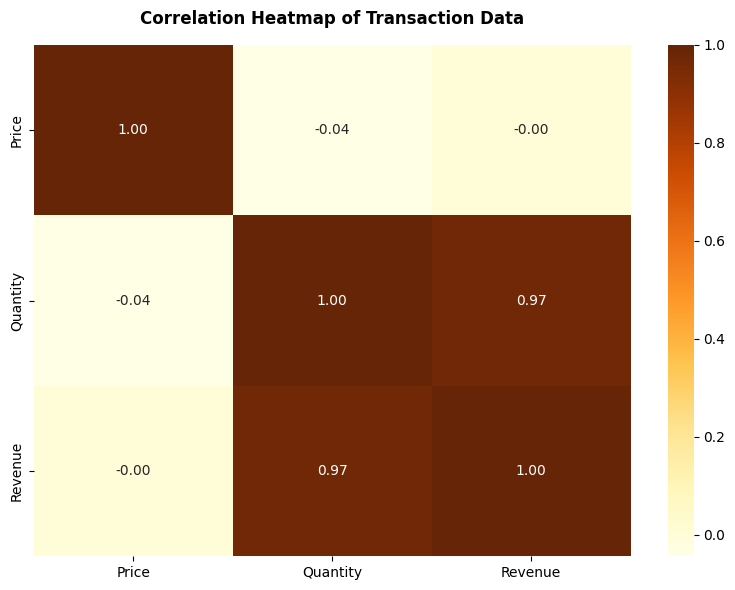

In [337]:
# Setting the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Creating the correlation heatmap
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='YlOrBr',
            fmt='.2f',
            ax=ax)

# Adding plot title
ax.set_title('Correlation Heatmap of Transaction Data', pad=15, weight='bold')

# Showing the plot
plt.tight_layout()
plt.show()


Temuan dan Hasil:

Satu-satunya variabel yang menunjukkan korelasi positif yang kuat adalah Pendapatan dan Kuantitas. Artinya, semakin besar jumlah barang yang dibeli (Quantity), maka semakin besar Revenue.

### Pair Plot

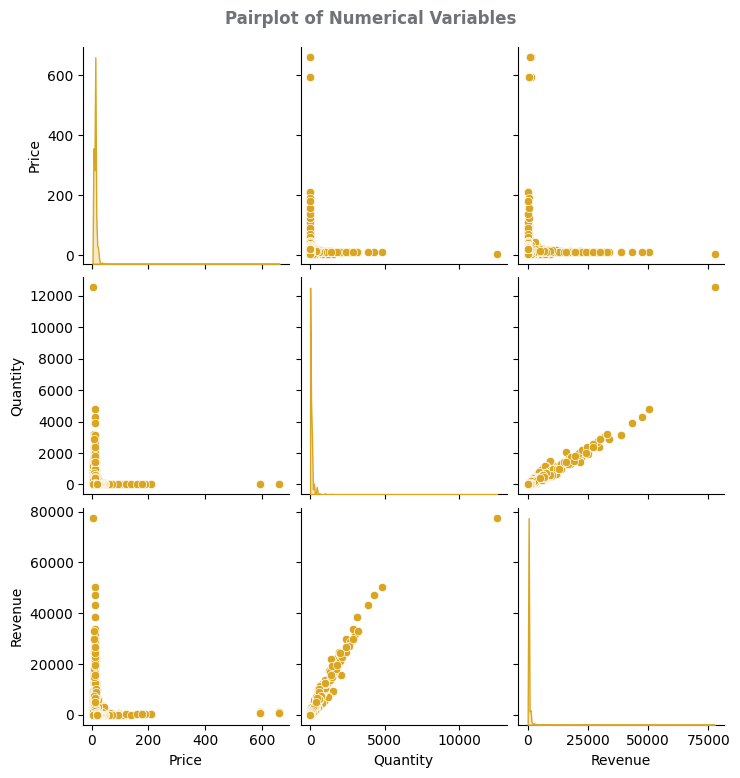

In [338]:
# Creating the pairplot
g = sns.pairplot(df[['Price', 'Quantity', 'Revenue']], diag_kind='kde',
                 plot_kws=dict(color='#DAA520'), diag_kws=dict(color='#DAA520'))

# Adding title
g.fig.suptitle('Pairplot of Numerical Variables', weight='bold', color='#6F7378', y=1.03)

# Showing the plot
plt.show()

Temuan dan Hasil:

Pada visualisasi sebelumnya (correlation Heatmap) terlihat hubungan positif yang kuat antara Kuantitas dan Pendapatan. Namun, perlu diperhatikan adanya outlier, yaitu transaksi dengan kuantitas melebihi 10.000, yang menghasilkan pendapatan 800.000. Outlier ini menunjukkan adanya pembelian yang sangat besar atau unik yang tidak mencerminkan tren hubungan secara keseluruhan. Selain Kuantitas dan Pendapatan, tidak ada variabel lain yang menunjukkan hubungan yang jelas dan signifikan.

# RFM: Preprocessing

Kolom yang dibutuhkan dari untuk RFM:

| Komponen      | Penjelasan                                 | Cara Hitung                                                  |
| ------------- | ------------------------------------------ | ------------------------------------------------------------ |
| **Recency**   | Seberapa *baru* pelanggan terakhir belanja | Tanggal analisis – Tanggal transaksi terakhir pelanggan (`Date`)     |
| **Frequency** | Seberapa *sering* pelanggan belanja        | Jumlah transaksi **unik** (`TransactionNo`) per pelanggan    |
| **Monetary**  | Total uang yang dikeluarkan                | Jumlah total dari `Revenue` (Price × Quantity) per pelanggan |


`Notes : Asumsi analisis dilakukan satu hari setelah tanggal transaksi terakhir yang tercatat.`

In [339]:
# Getting the max Date, nunique of TransactionNo, and sum of Revenue per customer
rfm_df = df.groupby('CustomerNo', as_index = False)[['Revenue', 'TransactionNo', 'Date']]\
                   .agg({'Date' : 'max',
                         'TransactionNo' : 'nunique',
                         'Revenue' : 'sum',})

# Renaming the columns
rfm_df.columns = ['CustomerNo', 'Recency', 'Frequency', 'Monetary']

# Converting the Recency column that contains max date to a datetime
rfm_df['Recency'] = pd.to_datetime(rfm_df['Recency'])

# Initializing 'date' variable that contains the analysis date
date = pd.to_datetime('2019-12-10')

# Subtracting max date from analysis date
rfm_df['Recency'] = date - rfm_df['Recency']

# Getting the days
rfm_df['Recency'] = rfm_df['Recency'].dt.days

# Checking the result
rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004,228,1,1509.60
1,12006,219,1,24.76
2,12008,277,1,5689.57
3,12013,360,1,69.96
4,12024,177,1,149.52
...,...,...,...,...
4712,18280,278,1,623.26
4713,18281,181,1,576.58
4714,18282,8,2,1044.86
4715,18283,4,16,11773.90


Berdasarkan data ini, terdapat total 4.717 pelanggan yang tercatat.

## Basic EDA

In [340]:
# Statistical summary of RFM data
rfm_df.describe(exclude = 'object').round(2)

,Recency,Frequency,Monetary
count,4717.00,4717.00,4717.00
mean,96.99,4.19,12918.90
std,101.72,7.40,51030.49
min,1.00,1.00,5.97
25%,19.00,1.00,1828.71
50%,54.00,2.00,4797.90
75%,157.00,5.00,11825.83
max,374.00,207.00,2112282.03


Temuan dan Hasil:

* Outliers: Kolom Frekuensi dan Moneter menunjukkan outlier yang ekstrem, dengan nilai masing-masing 207 transaksi dan £ 2.112.282. Variabel Recency juga menunjukkan potensi outlier sebanyak 374 hari. Outliers seperti ini bisa mengganggu analisis, terutama clustering seperti K-Means yang sensitif terhadap nilai ekstrem. Maka perlu penanganan khusus: misalnya transformasi log, trimming, atau scaling.

* Standar Deviasi > mean: Di semua variabel RFM, deviasi standar melebihi rata-rata, menunjukkan penyebaran titik data yang lebih luas di sekitar nilai rata-rata, menunjukkan bahwa data lebih tersebar dan kurang terkonsentrasi.

* Skew Kanan: Semua variabel RFM menampilkan distribusi miring ke kanan, dengan rata-rata lebih tinggi dari median. Skew ini dapat dikurangi dengan mengatasi outlier yang diidentifikasi sebelumnya.

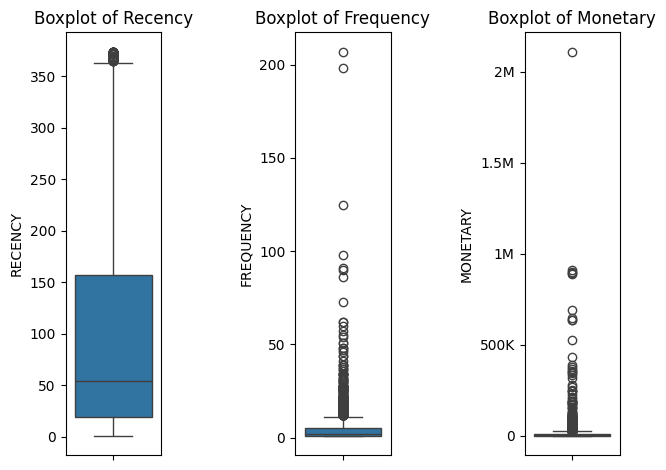

In [341]:
# Getting the RFM variables to plot
cols = rfm_df.columns[1:]

# Setting the figure and axes
fig, ax = plt.subplots(1, 3)

# Creating box plots
for col in range(len(cols)):

    # Plotting
    sns.boxplot(y=cols[col], data=rfm_df, ax=ax[col])

    # For the 'Monetary' box plot
    if cols[col] == 'Monetary':
        # Make the yticks more readable
        ax[col].set_yticks(range(0, 2500000, 500000), labels=['0', '500K', '1M', '1.5M', '2M'])

    # Set y-axis label in uppercase
    ax[col].set_ylabel(cols[col].upper())

    # Set plot title
    ax[col].set_title(f'Boxplot of {cols[col]}')

# Showing the figure with a tight layout
plt.tight_layout(w_pad=5)

Temuan dan Hasil:

* Recency: Variabel Recency menunjukkan beberapa outliers tetapi tidak memiliki outliers dengan nilai yang ekstrem, menunjukkan bahwa distribusi nilai recency relatif baik, tanpa outlier ekstrem yang secara signifikan berdampak pada pola data secara keseluruhan.

* Frekuensi dan Moneter: Sebaliknya, variabel Frekuensi dan Moneter menunjukkan beberapa outliers yang cenderung skew distribusinya ke nilai yang lebih tinggi (skew kanan). outliers ini diperlukan proses penanganan outlier untuk memastikan bahwa outlier tersebut tidak mempengaruhi analisis secara negatif.

## Outliers Handling

Karena clustering seperti K-Means yang sensitif terhadap nilai ekstrem maka diperlukan penanganan outlier untuk meminimalkan dampak terhadap clustering. Disini penanganan outlier menggunakan metode IQR untuk memastikan representasi cluster yang akurat dan lebih baik.

In [342]:
# Getting and printing the total rows before outlier handling
original_data = len(rfm_df)
print(f'Rows before outlier handling (IQR): {original_data}')

# Creating the filter mask
filtered_entries = np.array([True] * len(rfm_df))

# IQR filtering
for i in cols:
    q1 = rfm_df[i].quantile(0.25)
    q3 = rfm_df[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((rfm_df[i] >= low_limit) & (rfm_df[i] <= high_limit)) & filtered_entries

# Filtering the original data from outliers
rfm_df = rfm_df[filtered_entries]

# Getting and printing the total rows after outlier handling
new_data = len(rfm_df)
print(f'Rows after outlier handling (IQR): {new_data}')
print(f'Data loss: {round((original_data - new_data) / original_data * 100, 2)}%')

Rows before outlier handling (IQR): 4717
Rows after outlier handling (IQR): 4152
Data loss: 11.98%


Temuan dan Hasil:

Setelah penanganan outlier menggunakan metode IQR, data RFM mengalami kehilangan sekitar 11,98%. Data loss 11.98% tergolong signifikan tapi masih dapat diterima karena:

* Yang dibuang adalah outlier “tidak wajar”,

* Sisa data cukup representatif dan besar,

* Tujuan utama analisis akan lebih stabil tanpa pengaruh outlier ekstrem.

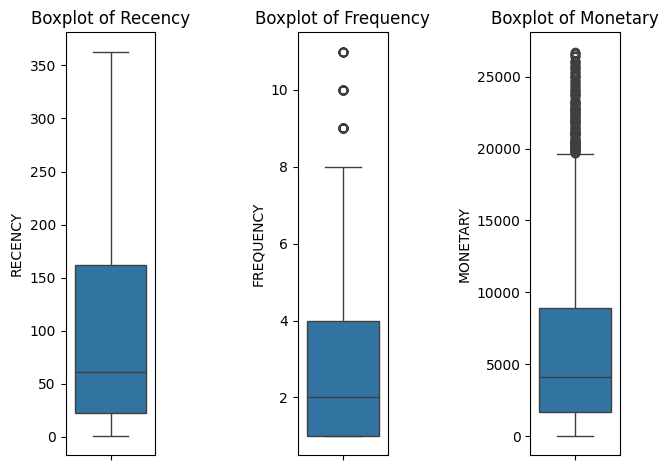

In [343]:
# Getting the RFM variables to plot
cols = rfm_df.columns[1:]

# Setting the figure and axes
fig, ax = plt.subplots(1, 3)

# Creating box plots
for col in range(len(cols)):

    # Creating the box plot with default color and style
    sns.boxplot(y=cols[col], data=rfm_df, ax=ax[col])

    # Setting axis labels and titles
    ax[col].set_ylabel(cols[col].upper())
    ax[col].set_title(f'Boxplot of {cols[col]}')

# Showing the figure with a tight layout
plt.tight_layout(w_pad=5)
plt.show()

Temuan dan Hasil:

Distribusi Frekuensi dan Moneter lebih bersih dan lebih baik secara representasi dan visualisasi. Meskipun masih ada beberapa outlier, namun masih dapat diterima karena nilainya yang moderat (tidak terlalu ekstrem) dan mencerminkan perilaku pembelian pelanggan yang beragam. Meskipun diidentifikasi sebagai outlier, pelanggan ini mewakili transaksi yang valid dan berkontribusi secara signifikan terhadap lanskap e-commerce.

In [344]:
# Simpan ke folder di Google Drive
rfm_df.to_csv("/content/drive/My Drive/Final Projek - Bayu Sadewa Azyumardi/data_rfm.csv", index=False)
print("File berhasil di-upload ke Google Drive.")

File berhasil di-upload ke Google Drive.


## Scaling

Clustering seperti K-Means mengukur jarak antar data, sehingga data scaling sangat penting untuk memastikan hasil pengelompokan yang akurat dan bermakna. scaling dapat menormalkan data, mencegah variabel dengan rentang yang lebih luas, seperti Moneter dalam kasus ini, agar tidak terlalu memengaruhi perhitungan jarak. Teknik ini memastikan bahwa semua variabel berkontribusi secara merata pada proses pengelompokan, yang mengarah pada hasil yang lebih seimbang dan representatif. Disini akan menggunakan Standardscaler().

Kenapa Memilih StandardScaler()?

* StandardScaler cocok untuk algoritma berbasis jarak seperti:

  * K-Means

  * Hierarchical Clustering

  * PCA

* Karena scaling-nya mempertahankan distribusi data (tidak mengubah bentuknya seperti log transform), tapi membuat unit-nya sejajar.



In [345]:
# Initializing the scaler object with Pandas DataFrame output
scaler = StandardScaler().set_output(transform = 'pandas')

# Fitting to RFM data (Excluding the CustomerNo)
scaler.fit(rfm_df.iloc[:, 1:])

# Transform the RFM data (Excluding the CustomerNo)
rfm_df_std = scaler.transform(rfm_df.iloc[:, 1:])

# Checking the output
rfm_df_std

,Recency,Frequency,Monetary
0,1.316698,-0.839255,-0.791339
1,1.224169,-0.839255,-1.042918
2,1.820467,-0.839255,-0.083120
3,2.673790,-0.839255,-1.035260
4,0.792367,-0.839255,-1.021780
...,...,...,...
4711,-0.266576,-0.839255,-0.902313
4712,1.830748,-0.839255,-0.941513
4713,0.833491,-0.839255,-0.949422
4714,-0.945121,-0.382739,-0.870081


# RFM: Dimensionality Reduction (PCA)

PCA di sini untuk meningkatkan kinerja k-means dengan mengurangi redundansi dan berfokus pada variabel yang informatif. Metode ini meminimalkan dampak multikolinieritas, terutama pada variabel RFM yang dikenal memiliki multikolinieritas tinggi. PCA juga memfasilitasi visualisasi klaster dengan scatter plot 2D, bukan 3D, sehingga menyederhanakan pemahaman klaster.

In [346]:
# Initializing the PCA object with 2 components
pca = PCA(n_components = 2)

# Fitting the PCA to the scaled rfm dataset
pca.fit(rfm_df_std)

# Transforming the scaled rfm dataset to PCA
pca_df = pd.DataFrame(pca.transform(rfm_df_std), columns = ['pc1', 'pc2'])

# Ensuring that the index is the same with the original rfm dataset
pca_df.set_index(rfm_df.index, inplace = True)

# Showing the output
pca_df

,pc1,pc2
0,-1.649664,0.577392
1,-1.755851,0.382455
2,-1.469574,1.335147
3,-2.459307,1.631188
4,-1.532219,0.021239
...,...,...
4711,-0.943094,-0.833563
4712,-1.991115,0.950041
4713,-1.508766,0.089771
4714,-0.303776,-1.298026


# Modeling

## RFM: Clustering with k-means

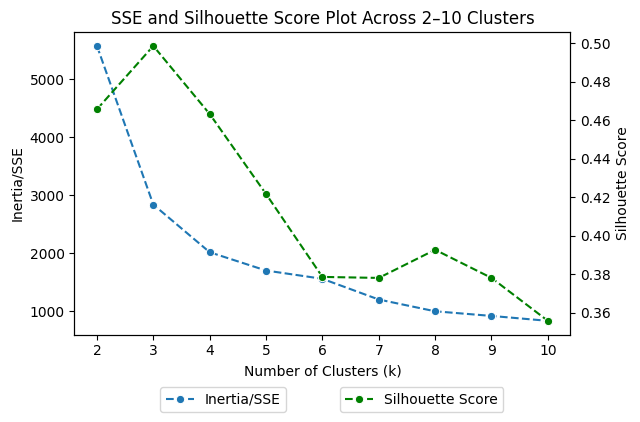

In [347]:
# Empty variables to be filled with sse (inertia) and silhouette scores
sse = []
silhouette = []

# Getting the sse and silhouette scores for k = 2 to k = 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(pca_df)
    sse.append(kmeans.inertia_)
    cluster_label = kmeans.labels_
    silhouette.append(silhouette_score(pca_df, cluster_label))

# Plot of sse (inertia) and silhouette metrics
fig, ax = plt.subplots()

# Plotting SSE
sns.lineplot(x=range(2, 11), y=sse, marker='o', linestyle='--', label='Inertia/SSE', ax=ax)

# Adding secondary y-axis for Silhouette Score
ax2 = ax.twinx()
sns.lineplot(x=range(2, 11), y=silhouette, marker='o', linestyle='--', color='green', label='Silhouette Score', ax=ax2)

# Labels and title
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia/SSE')
ax2.set_ylabel('Silhouette Score')
ax.set_title('SSE and Silhouette Score Plot Across 2–10 Clusters')

# Legends
ax.legend(loc='upper center', bbox_to_anchor=(0.3, -0.15), ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.15), ncol=1)

plt.subplots_adjust(bottom=0.25)
plt.show()

Temuan dan Hasil:

Kita dapat melihat bahwa nilai optimal untuk k adalah 3, yang memiliki skor silhouette tertinggi dan terletak di bagian siku pada plot SSE.

In [348]:
# K-means clustering with k = 3
km = KMeans(n_clusters = 3, random_state = 10)
km.fit(pca_df)

# Assigning the cluster label to the PCA data to be visualized
pca_df['Cluster'] = km.labels_

## Cluster Analysis

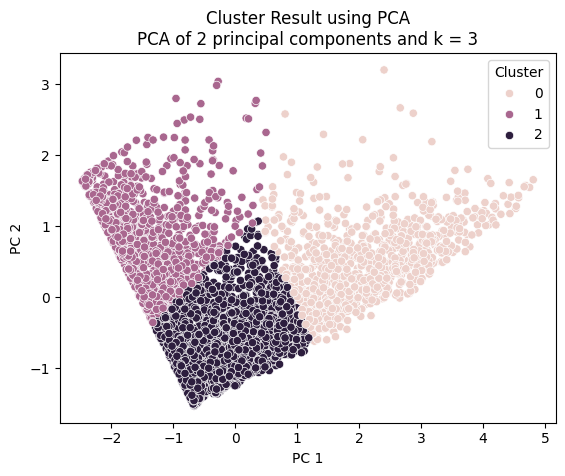

In [349]:
# Setting the figure and axes
fig, ax = plt.subplots()

# Plotting
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=pca_df, ax=ax)

# Label
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

# Title
ax.set_title('Cluster Result using PCA\nPCA of 2 principal components and k = 3')

# Legend
ax.legend(title='Cluster')

# Show the Plot
plt.show()

Temuan dan Hasil:

Berdasarkan scatter plot PCA dengan k-means (k = 3). Terlihat ada 3 kelompok utama pelanggan (Cluster 0, 1, dan 2) yang terpisah dengan baik di ruang 2 dimensi hasil PCA. Pemisahan ini mengindikasikan bahwa variabel RFM (Recency, Frequency, Monetary) yang digunakan memiliki informasi yang cukup untuk membedakan tipe pelanggan.

# Evaluation

## Interpreting

In [350]:
# Assigning produced clusters from the PCA data to the RFM data
rfm_df['Cluster'] = pca_df['Cluster']

# Grouping by cluster and aggregating the min, max, and median of RFM variables
rfm_df.groupby('Cluster').agg({'Recency' : ['mean', 'median', 'min', 'max'],
                               'Frequency' : ['mean', 'median', 'min', 'max'],
                               'Monetary' : ['mean', 'median', 'min', 'max']})

Recency                  Frequency                     Monetary  \
               mean median  min  max      mean median min max          mean   
Cluster                                                                       
0         39.878319   25.0    1  265  5.995575    6.0   1  11  14818.608628   
1        239.759079  239.0  134  363  1.440213    1.0   1   6   2908.185182   
2         51.046248   43.0    1  173  2.236432    2.0   1   7   4238.143365   

                                       
            median      min       max  
Cluster                                
0        14581.665  1657.98  26757.76  
1         1838.400    11.53  21255.40  
2         3495.400     5.97  17016.46

In [351]:
# Q1, Q3, IQR Function
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def iqr(x):
    return q3(x) - q1(x)

# Grouping
rfm_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max', q1, q3, iqr],
    'Frequency': ['mean', 'median', 'min', 'max', q1, q3, iqr],
    'Monetary': ['mean', 'median', 'min', 'max', q1, q3, iqr]
})

# Rename Column
rfm_summary.columns = [
    f"{col[0]}_{col[1] if col[1] not in ['<lambda>', 'q1', 'q3'] else col[1].upper()}"
    for col in rfm_summary.columns
]
rfm_summary.rename(columns=lambda x: x.replace('<lambda>', 'IQR'), inplace=True)

# Show result
rfm_summary

,Recency_mean,Recency_median,Recency_min,Recency_max,Recency_Q1,Recency_Q3,Recency_iqr,Frequency_mean,Frequency_median,Frequency_min,...,Frequency_Q1,Frequency_Q3,Frequency_iqr,Monetary_mean,Monetary_median,Monetary_min,Monetary_max,Monetary_Q1,Monetary_Q3,Monetary_iqr
Cluster,,,,,,,,,,,,,,,,,,,,,
0,39.878319,25.0,1,265,10.0,54.0,44.0,5.995575,6.0,1,...,4.0,7.0,3.0,14818.608628,14581.665,1657.98,26757.76,10937.5425,18260.045,7322.5025
1,239.759079,239.0,134,363,186.0,288.0,102.0,1.440213,1.0,1,...,1.0,2.0,1.0,2908.185182,1838.400,11.53,21255.40,872.2100,3759.120,2886.9100
2,51.046248,43.0,1,173,19.0,75.0,56.0,2.236432,2.0,1,...,1.0,3.0,2.0,4238.143365,3495.400,5.97,17016.46,1760.7100,6109.500,4348.7900


Temuan dan Hasil:

Berdasarkan ringkasan statistik dari cluster yang teridentifikasi, kita dapat memberi label sementara untuk setiap cluster sebagai berikut:

* Cluster 0: Loyal Customer (R Terendah, F Tertinggi, dan M Tertinggi)
* Cluster 1: At Risk Customer (R Tertinggi, F Terendah, dan M Terendah)
* Cluster 2: Occasional Customer (R, F, dan M Sedang)

Interpretasi dari hasil clustering RFM:

* Cluster 0 – Loyal Customers

  * Recency (R) rendah → Mereka baru saja berbelanja.

  * Frequency (F) tertinggi → Sering berbelanja.

  * Monetary (M) tertinggi → Nilai transaksi paling besar.

→ Kesimpulan: Pelanggan paling bernilai (loyal & aktif).

* Cluster 1 – At-Risk Customers

  * Recency (R) tertinggi → Sudah lama tidak berbelanja.

  * Frequency (F) rendah → Jarang berbelanja.

  * Monetary (M) rendah → Nilai belanja kecil.

→ Kesimpulan: Pelanggan yang berpotensi hilang atau tidak aktif lagi.

* Cluster 2 – Occasional Customers
  
  * Recency (R) sedang → Mereka belanja tidak terlalu lama sejak transaksi terakhir.

  * Frequency (F) sedang → Frekuensi belanja moderat.

  * Monetary (M) sedang → Nilai pembelian juga rata-rata.

→ Kesimpulan: Pelanggan biasa yang sesekali berbelanja.




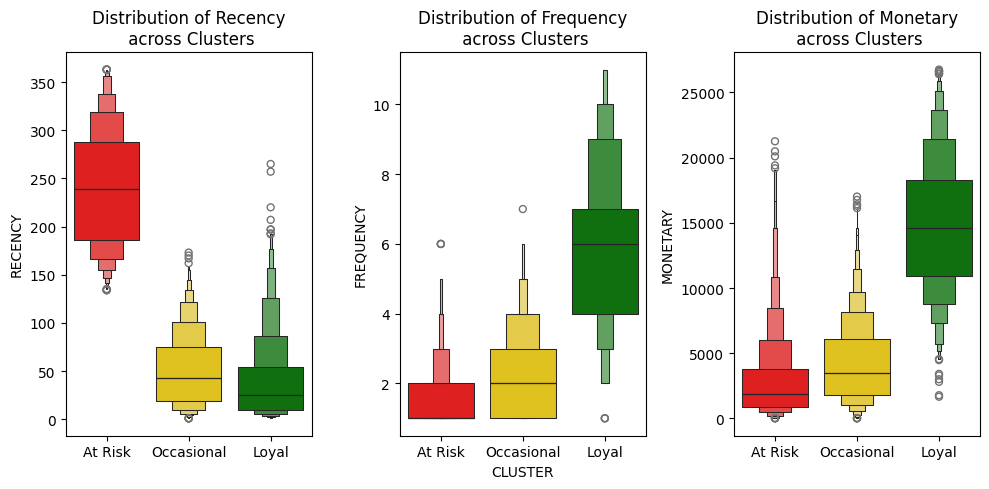

In [352]:
# Adding the ClusterName feature
cluster_map = {0: 'Loyal',
               1: 'At Risk',
               2: 'Occasional'}

rfm_df['ClusterName'] = rfm_df['Cluster'].map(cluster_map)

# Color
palette = {'Occasional': 'gold', 'Loyal': 'green', 'At Risk': 'red'}

# Variabel RFM
cols = rfm_df.columns.tolist()[1:4]

# Box plot of each cluster
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i in range(len(cols)):
    sns.boxenplot(x='ClusterName', y=cols[i], data=rfm_df, palette=palette, ax=ax[i])

    # Adding plot titles
    ax[i].set_title(f'Distribution of {cols[i]}\n across Clusters')

    # Label axis
    if i == 1:
        ax[i].set_xlabel('CLUSTER')
    else:
        ax[i].set_xlabel('')
    ax[i].set_ylabel(cols[i].upper())

plt.tight_layout()
plt.show()

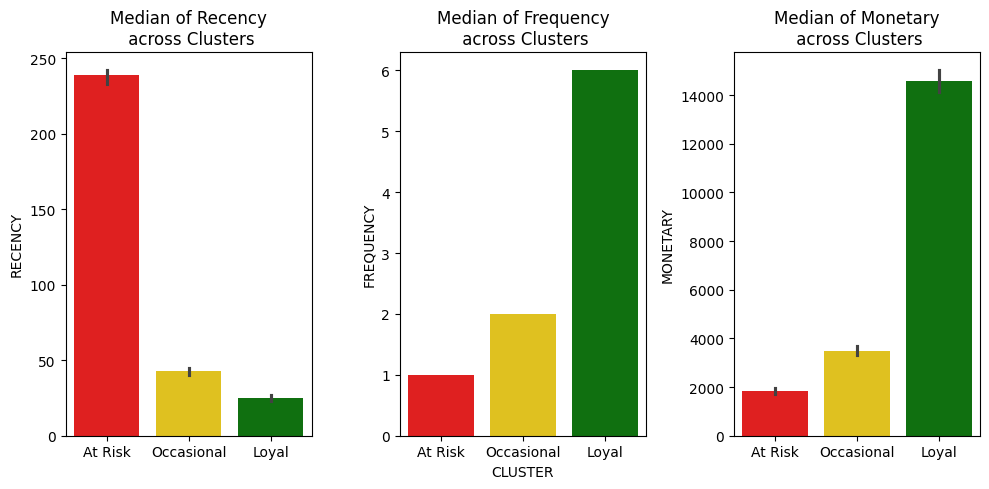

In [353]:
# Mapping cluster names
cluster_map = {0: 'Loyal',
               1: 'At Risk',
               2: 'Occasional'}
rfm_df['ClusterName'] = rfm_df['Cluster'].map(cluster_map)

# Color for each cluster
palette = {'Occasional': 'gold', 'Loyal': 'green', 'At Risk': 'red'}

# Variabel RFM
cols = rfm_df.columns.tolist()[1:4]

# Subplot
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Create RFM median barplots for each cluster
for i in range(len(cols)):
    sns.barplot(x='ClusterName', y=cols[i], data=rfm_df,
                estimator='median', palette=palette, ax=ax[i])

    ax[i].set_title(f'Median of {cols[i]}\n across Clusters')

    # Label axis
    if i == 1:
        ax[i].set_xlabel('CLUSTER')
    else:
        ax[i].set_xlabel('')
    ax[i].set_ylabel(cols[i].upper())

plt.tight_layout()
plt.show()

Temuan dan Hasil:

Interpretasi dari bar dan box plot:

Dari plot batang dan kotak ini, kita dapat merumuskan karakteristik masing-masing klaster:

1. At-risk Customers

* High Recency:
  * Pelanggan pada cluster ini sudah lama tidak melakukan transaksi (median 239 hari sejak pembelian terakhir).
  * Rentang waktu sejak transaksi terakhir juga cukup lebar (IQR = 102 hari), di mana pelanggan biasanya memiliki waktu sekitar 186-288 hari sejak pesanan terakhir mereka. Ini menunjukkan banyak pelanggan mulai tidak aktif.
  * Hal ini mengindikasikan potensi hilangnya minat terhadap platform e-commerce atau pergeseran ke opsi alternatif.

* Low Frequency:
  * Pelanggan jarang berbelanja (median 1 transaksi).
  * Variasi jumlah transaksi relatif kecil (IQR = 1 transaksi), di mana pelanggan biasanya bertransaksi 1-2 kali.
  * Hal ini menunjukkan bahwa mereka mungkin tidak menemukan produk atau layanan yang mereka butuhkan di platform atau tertarik pada pesaing yang menawarkan produk, penawaran, atau diskon yang lebih baik.

* Low Monetary:
  * Pengeluaran pelanggan ini relatif kecil (median £1.838).
  * Sebagian besar pelanggan hanya mengeluarkan antara £885 hingga £3.820.
  * Hal ini menunjukkan bahwa mereka mungkin tidak menganggap produk tersebut sebagai nilai tambah yang bernilai tinggi atau memiliki kendala anggaran yang membatasi pengeluaran mereka.

2. Occasional Customers

* Moderate recency:
  * Pelanggan masih cukup baru atau pernah berbelanja tidak terlalu lama (median 43 hari sejak transaksi terakhir).
  * Variasi waktu transaksi moderat (IQR = 56 hari), di mana pelanggan biasanya memiliki waktu sekitar 19-75 hari sejak pesanan terakhir mereka. Ini menunjukkan masih ada keterlibatan dengan platform.
  * Hal ini mengindikasikan bahwa mereka masih sadar akan merek dan mungkin terbuka untuk keterlibatan di masa depan.
  * Namun, mereka mungkin tidak terlibat secara aktif seperti pelanggan dengan skor frekuensi yang lebih tinggi, sehingga menunjukkan perlunya upaya pemasaran yang ditargetkan untuk mempertahankan minat mereka.

* Moderate Frequency:
  * Pelanggan berbelanja dengan frekuensi menengah (median 2 transaksi).
  * Sebagian besar memiliki 1–3 transaksi sejauh ini.
  * Hal ini menunjukkan bahwa mereka tertarik dengan produk yang ditawarkan tetapi mungkin bukan pelanggan tetap.
  * Mereka mungkin responsif terhadap promosi harga, inovasi e-commerce, atau kampanye pemasaran yang dipersonalisasi untuk meningkatkan frekuensi pembelian.

* Moderate Monetary:
  * Pengeluaran moderat (median £3.495).
  * Variasi pengeluaran cukup lebar (IQR = £4.397), di mana pelanggan biasanya membelanjakan sekitar £ 1.764 - £ 6.161 hingga saat ini secara total.
  * Hal ini menunjukkan bahwa mereka melihat beberapa nilai dalam produk e-commerce tetapi mungkin melihatnya sebagai sesuatu yang bukan pilihan utama mereka.
  * Mereka mungkin memiliki pilihan e-commerce lain yang bersaing atau sadar akan harga, sehingga ada peluang untuk memberikan penawaran eksklusif atau rekomendasi yang dipersonalisasi.

3. Loyal Customers

* Low Recency:
  * Pelanggan setia baru saja melakukan pemesanan di e-commerce, dengan median 25 hari sejak pesanan terakhir mereka pada analisis ini.
  * Penyebaran recency lebih ketat daripada cluster lainnya (IQR = 44 hari), di mana pelanggan biasanya memiliki waktu sekitar 10 - 54 hari sejak pesanan terakhir mereka pada analisis ini.
  * Hal ini menunjukkan bahwa mereka secara aktif terlibat dengan platform dan kemungkinan akan terus melakukannya.
  * Mereka mungkin adalah orang-orang yang paling responsif terhadap produk baru, promosi musiman, dan inovasi baru di platform e-commerce.

* High Frequency:
  * Pelanggan setia sering melakukan pemesanan, dengan median 6 pesanan hingga saat ini.
  * Sebaran frekuensinya lebih luas dibandingkan dengan klaster lainnya (IQR = 3 transaksi), dimana pelanggan biasanya bertransaksi sebanyak 4 - 7 kali hingga saat ini.
  * Hal ini menunjukkan bahwa mereka adalah pelanggan yang terbiasa mengandalkan produk e-commerce.
  * Oleh karena itu, mereka mungkin rentan terhadap perubahan harga atau ketersediaan produk.

* High Monetary:
  * Pelanggan setia membelanjakan uang dalam jumlah besar saat mereka memesan, dengan median £14.581.
  * Penyebaran moneter lebih luas daripada klaster lainnya (IQR = £7.447), di mana pelanggan biasanya menghabiskan sekitar £10.956 - £18.404.
  * Hal ini menunjukkan bahwa mereka melihat nilai yang tinggi pada produk e-commerce dan bersedia membayar dengan harga tinggi.
  * Mereka mungkin akan mempertimbangkan peningkatan dan layanan tambahan.

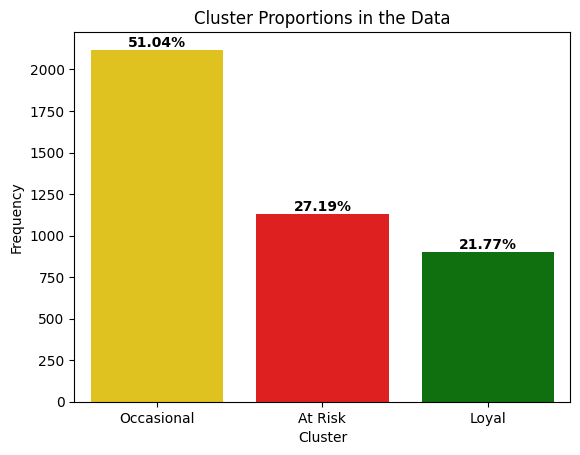

In [354]:
# Calculate the proportion and frequency of each cluster
cluster_size = rfm_df['ClusterName'].value_counts().reset_index()
cluster_size.columns = ['ClusterName', 'count']
cluster_size['prop'] = round((cluster_size['count'] / cluster_size['count'].sum()) * 100, 2)

# Color for each cluster
palette = {'Occasional': 'gold', 'At Risk': 'red', 'Loyal': 'green'}

# Plot bar
fig, ax = plt.subplots()
sns.barplot(x='ClusterName', y='count', data=cluster_size, palette=palette, ax=ax)

# Labeling
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(),
            f"{cluster_size['prop'][i]}%",
            ha='center', va='bottom', fontweight='bold')

# Labels and titles
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_title('Cluster Proportions in the Data')

plt.show()

Temuan dan Hasil:

1. Mayoritas pelanggan adalah Occasional Customers

* Proporsinya 51,04% dari total pelanggan.

* Artinya, lebih dari separuh pelanggan hanya membeli sesekali, bukan pelanggan yang konsisten.

* Ini peluang besar untuk meningkatkan keterlibatan melalui promosi atau program loyalitas.

2. At Risk Customers cukup signifikan

* Proporsinya 27,19%.

* Mereka memiliki jarak pembelian terakhir yang lama dan frekuensi rendah, berpotensi meninggalkan platform sepenuhnya jika tidak ada strategi retensi.

3. Loyal Customers adalah yang paling sedikit

* Proporsinya hanya 21,77%.

* Walaupun kecil, mereka adalah pelanggan dengan nilai transaksi dan frekuensi tertinggi sehingga penting untuk dipertahankan.

`Kesimpulan:`
Fokus utama bisa diarahkan ke meningkatkan loyalitas dari Occasional dan strategi retensi untuk At Risk

Rekomendasi bisnis:

1. **Occasional Customers (51,04%)**

`Masalah:` Mereka sudah pernah bertransaksi tetapi tidak rutin, dengan frekuensi dan nilai transaksi menengah.

Rekomendasi:

* Program loyalitas: Buat loyalty point atau cashback khusus untuk meningkatkan frekuensi pembelian.

* Promosi personalisasi: Kirimkan rekomendasi produk sesuai riwayat belanja untuk mendorong pembelian ulang.

* Bundling produk & diskon periodik: Mendorong mereka untuk meningkatkan nilai belanja per transaksi.

2. **At-Risk Customers (27,19%)**

`Masalah:` Sudah lama tidak bertransaksi, transaksi rendah, dan nilai belanja kecil. Berpotensi churn.

Rekomendasi:

  * Kampanye win-back: Kirimkan email atau push notification berisi diskon khusus untuk menarik mereka kembali.

  * Penawaran khusus pengguna lama: Gratis ongkir atau diskon eksklusif untuk pengguna yang tidak aktif dalam 3–6 bulan terakhir.

  * Survey kepuasan: Cari tahu alasan mereka berhenti berbelanja (harga, produk, pengalaman layanan).

3. **Loyal Customers (21,77%)**

`Masalah:` Jumlah kecil tetapi memiliki kontribusi nilai transaksi terbesar.

Rekomendasi:

  * VIP Membership: Berikan status khusus dengan manfaat (diskon eksklusif, early access produk baru).

  * Upselling & Cross-selling: Tawarkan produk premium atau bundling dengan nilai tinggi.

  * Customer Experience Premium: Layanan lebih cepat, pengiriman gratis, atau support prioritas untuk meningkatkan retensi.

# Deployment

In [355]:
import joblib

# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

# Simpan pca
joblib.dump(pca, 'pca.pkl')

# Simpan model KMeans
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [356]:
from sklearn.pipeline import Pipeline

# Ambil fitur RFM
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Buat pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=3, random_state=10))
])

# Fit pipeline
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3, random_state=10))])

In [357]:
# Simpan pipeline
joblib.dump(pipeline, 'pipeline_rfm.pkl')

['pipeline_rfm.pkl']

In [358]:
!pwd

/content


In [359]:
import shutil

# Salin file ke Drive
shutil.copy('scaler.pkl', '/content/drive/MyDrive/Final Projek - Bayu Sadewa Azyumardi/')
shutil.copy('pca.pkl', '/content/drive/MyDrive/Final Projek - Bayu Sadewa Azyumardi/')
shutil.copy('kmeans_model.pkl', '/content/drive/MyDrive/Final Projek - Bayu Sadewa Azyumardi/')
shutil.copy('pipeline_rfm.pkl', '/content/drive/MyDrive/Final Projek - Bayu Sadewa Azyumardi/')

'/content/drive/MyDrive/Final Projek - Bayu Sadewa Azyumardi/pipeline_rfm.pkl'